<a href="https://colab.research.google.com/github/KojiroAsano/autoencoder/blob/main/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autoencoder is the one type of the Generative model

In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt


'''
to get the data
'''
# to check you can use GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)


# dowload the desined path
DIR = '/content'
fmnist = datasets.FashionMNIST(root=DIR, train=False, download=True)

cuda:0


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



0 Ankle boot


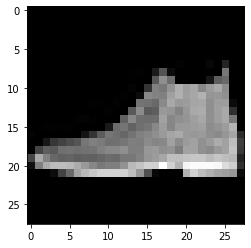

1 Pullover


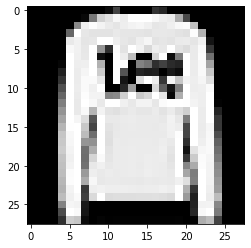

2 Trouser


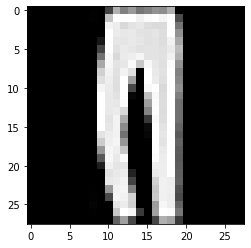

3 Trouser


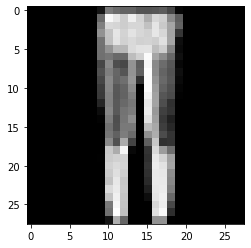

4 Shirt


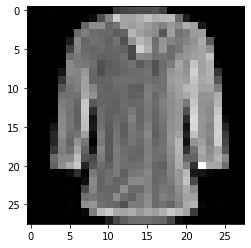

5 Trouser


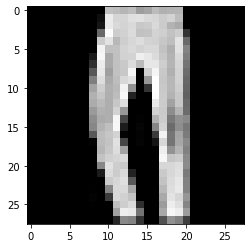

6 Coat


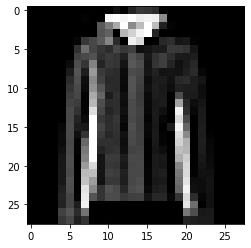

7 Shirt


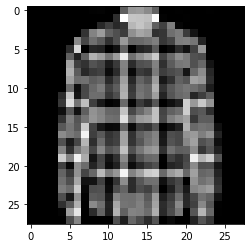

8 Sandal


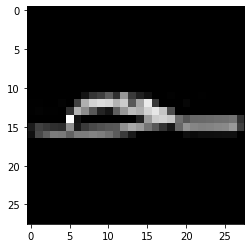

9 Sneaker


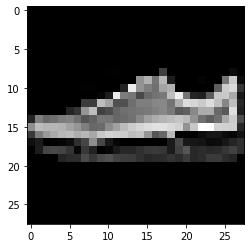

In [2]:
'''
To check the dataset images
'''
for i in range(10):
  print(i, fmnist.classes[fmnist[i][1]])
  plt.imshow(np.array(fmnist[i][0]), 'gray')
  plt.show()

In [3]:
class DataSubset(torch.utils.data.Dataset):
  def __init__(self, orig_dataset, use_classes, n_each, transform=transforms.ToTensor()):
    self.orig_dataset = orig_dataset # original data
    self.use_classes = use_classes # id list to use
    self.n_each = n_each # the number of pics
    self.transform = transform # to transform images
    n_cls = len(self.use_classes) # class number

    # index
    list_each = [[] for ci in range(n_cls)]
    for i, (_, label) in enumerate(orig_dataset): # read in order
      if all(len(list_each[ci]) >= n_each for ci in range(n_cls)):
        break
      # add to list
      if label in use_classes:
        list_each[use_classes.index(label)].append(i)
    self.idx_list = \
      sum([list_each[ci][0:n_each] for ci in range(n_cls)], [])

  def __len__(self):
    """ new data size """
    return len(self.idx_list)

  def __getitem__(self, index):
    """ load the data """
    img = self.orig_dataset[self.idx_list[index]][0]
    return self.transform(img)

In [10]:

IMG_MEAN, IMG_STD = (0.5, 0.5)

trans = transforms.Compose([
      transforms.Resize(64),
      transforms.ToTensor(),
      transforms.Normalize((IMG_MEAN,), (IMG_STD))
  ])

use_classes = [1, 6, 9]
for c in use_classes:
  print(fmnist.classes[c])

dataset = DataSubset(orig_dataset=fmnist,
                     n_each=200,
                     use_classes=[1, 6, 9],
                     transform=trans
                     )

print('dataset size:', len(dataset))


Trouser
Shirt
Ankle boot
dataset size: 600


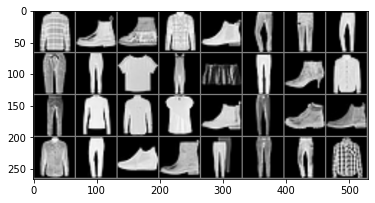

In [13]:
batch_size = 32
loader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, shuffle=True
)

def tensor_imshow(img, title=None, show=True):
  img = img.numpy().transpose((1, 2, 0))
  img = IMG_STD * img + IMG_MEAN
  plt.imshow(np.clip(img, 0, 1))
  if title is not None: plt.title(title)
  if show: plt.show()

tensor_imshow(torchvision.utils.make_grid(next(iter(loader))))
